In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%config InlineBackend.figure_format='retina'

In [2]:
dir_cat = './'
#vit_df = pd.read_csv(dir_cat+'gz2_vit_09172021_0000_predictions.csv')
#resnet_df = pd.read_csv(dir_cat+'gz2_resnet50_A_predictions.csv')
df = pd.read_csv(dir_cat+'gz2_predictions.csv')

In [3]:
df_vTrT = df[df.vitTresT == 1]
df_vTrF = df[df.vitTresF == 1]
df_vFrT = df[df.vitFresT == 1]
df_vFrF = df[df.vitFresF == 1]

In [4]:
print(f'Number of galaxies in test set  : {len(df)}\n')
print(f'ViT True , resnet True  galaxies: {len(df_vTrT)}')
print(f'ViT True , resnet False galaxies: {len(df_vTrF)}')
print(f'ViT False, resnet True  galaxies: {len(df_vFrT)}')
print(f'ViT False, resnet False galaxies: {len(df_vFrF)}')

df.head()

Number of galaxies in test set  : 31191

ViT True , resnet True  galaxies: 24009
ViT True , resnet False galaxies: 1116
ViT False, resnet True  galaxies: 2683
ViT False, resnet False galaxies: 3383


,GalaxyID,class,pred_vit,pred_res,vitTresT,vitTresF,vitFresT,vitFresF,dr7objid,dered_u,...,modelMag_g,modelMag_r,modelMag_i,modelMag_z,lnLDeV_r,lnLExp_r,petroR50_r,petroR90_r,dered_g_r,model_g_r
0,17,0,0,0,1,0,0,0,587722981742084303,19.673649,...,17.684530,16.527191,16.059088,15.693376,-116.616010,-2148.49630,3.208182,9.783567,1.127535,1.157339
1,20,1,1,1,1,0,0,0,587722981742215305,18.132294,...,17.020500,16.340689,15.930616,15.669191,-15.639699,-1587.02050,2.254702,6.496093,0.649712,0.679811
2,24,3,3,3,1,0,0,0,587722981743067266,19.062454,...,17.607351,16.784702,16.297028,15.943096,-254.417700,-378.97885,2.058299,5.655466,0.794344,0.822649
3,36,5,5,7,0,1,0,0,587722981744115851,20.079730,...,18.312954,17.014105,16.509523,16.134436,-171.511660,-1629.12650,3.177179,9.275770,1.274666,1.298849
4,49,3,3,3,1,0,0,0,587722981745295552,17.256195,...,15.881178,15.132768,14.722395,14.406494,-4681.504400,-1925.91130,9.300726,22.432047,0.723113,0.748410


   class  count  test_set  vitT_resT  vitT_resF  vitF_resT  vitF_resF
0      0   6755  0.216569       5961        168        354        272
1      1   7845  0.251515       6491        285        514        555
2      2   1471  0.047161        931         80        163        297
3      3   3295  0.105639       2848         90        165        192
4      4   4148  0.132987       3119        130        399        500
5      5   6094  0.195377       4058        262        780        994
6      6   1176  0.037703        413         73        225        465
7      7    407  0.013049        188         28         83        108


Text(0.5, 0, 'galaxy morphology class')

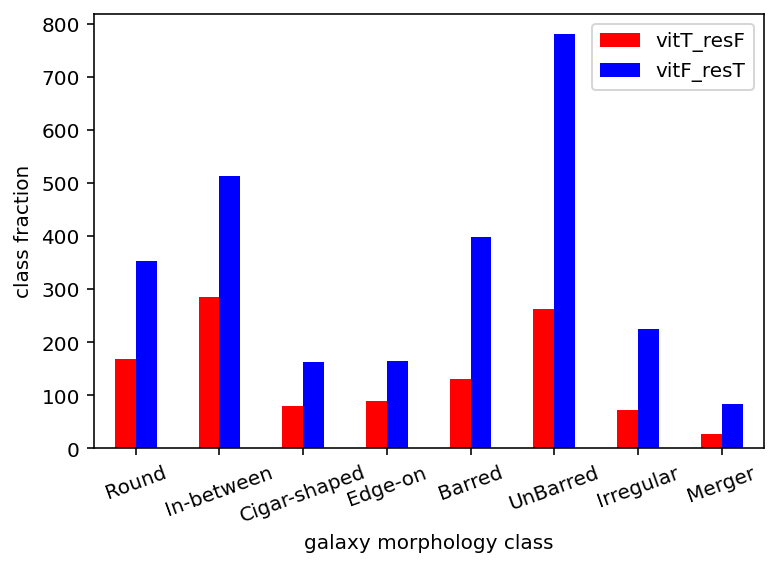

In [5]:
df_stats = df.groupby(['class'])['class'].agg('count').to_frame('count').reset_index()
df_stats['test_set'] = df_stats['count']/df_stats['count'].sum()

df_stats['vitT_resT'] = df_vTrT.groupby('class').size() #/ df_stats['count'].sum()
df_stats['vitT_resF'] = df_vTrF.groupby('class').size() #/ df_stats['count'].sum()
df_stats['vitF_resT'] = df_vFrT.groupby('class').size() #/ df_stats['count'].sum()
df_stats['vitF_resF'] = df_vFrF.groupby('class').size() #/ df_stats['count'].sum()

print(df_stats)
###### plot ######

#ax = df_stats.plot.bar(x='class', y=['test_set', 'vitT_resT', 'vitT_resF', 'vitF_resT', 'vitF_resF'], rot=20, color=['gray', 'orange', 'red', 'blue', 'skyblue'])
#ax = df_stats.plot.bar(x='class', y=['test_set', 'vitT_resT'], rot=20, color=['gray', 'orange', 'red', 'blue', 'skyblue'])
ax = df_stats.plot.bar(x='class', y=['vitT_resF', 'vitF_resT'], rot=20, color=['red', 'blue', 'skyblue'])
#ax = df_stats.plot.bar(x='class', y=['vitT_resT', 'vitF_resF'], rot=20, color=['orange', 'skyblue'])


ax.set_xticklabels(['Round','In-between','Cigar-shaped','Edge-on','Barred','UnBarred','Irregular','Merger'])
ax.set_ylabel('class fraction')
ax.set_xlabel('galaxy morphology class')

In [6]:
df_vFrT.groupby('class').size()

class
0    354
1    514
2    163
3    165
4    399
5    780
6    225
7     83
dtype: int64

   class  count  test_set  vitT_resT  vitT_resF  vitF_resT  vitF_resF
0      0   6755  0.216569   0.248282   0.150538   0.131942   0.080402
1      1   7845  0.251515   0.270357   0.255376   0.191577   0.164056
2      2   1471  0.047161   0.038777   0.071685   0.060753   0.087792
3      3   3295  0.105639   0.118622   0.080645   0.061498   0.056754
4      4   4148  0.132987   0.129910   0.116487   0.148714   0.147798
5      5   6094  0.195377   0.169020   0.234767   0.290719   0.293822
6      6   1176  0.037703   0.017202   0.065412   0.083861   0.137452
7      7    407  0.013049   0.007830   0.025090   0.030936   0.031924


Text(0.5, 0, 'galaxy morphology class')

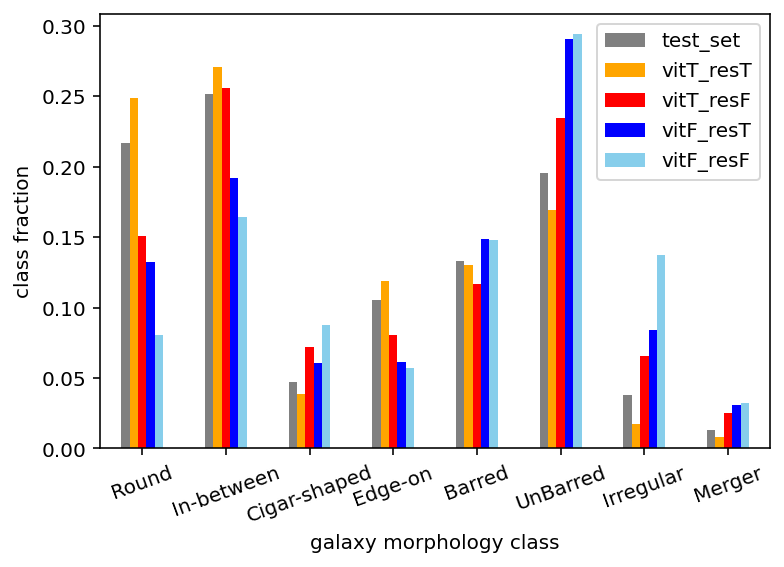

In [7]:
df_stats = df.groupby(['class'])['class'].agg('count').to_frame('count').reset_index()
df_stats['test_set'] = df_stats['count']/df_stats['count'].sum()

df_stats['vitT_resT'] = df_vTrT.groupby('class').size() / df_vTrT.groupby('class').size().sum()
df_stats['vitT_resF'] = df_vTrF.groupby('class').size() / df_vTrF.groupby('class').size().sum()
df_stats['vitF_resT'] = df_vFrT.groupby('class').size() / df_vFrT.groupby('class').size().sum()
df_stats['vitF_resF'] = df_vFrF.groupby('class').size() / df_vFrF.groupby('class').size().sum()

print(df_stats)
###### plot ######

ax = df_stats.plot.bar(x='class', y=['test_set', 'vitT_resT', 'vitT_resF', 'vitF_resT', 'vitF_resF'], rot=20, 
                      color=['gray', 'orange', 'red', 'blue', 'skyblue'])

ax.set_xticklabels(['Round','In-between','Cigar-shaped','Edge-on','Barred','UnBarred','Irregular','Merger'])
ax.set_ylabel('class fraction')
ax.set_xlabel('galaxy morphology class')

# color, size distributions

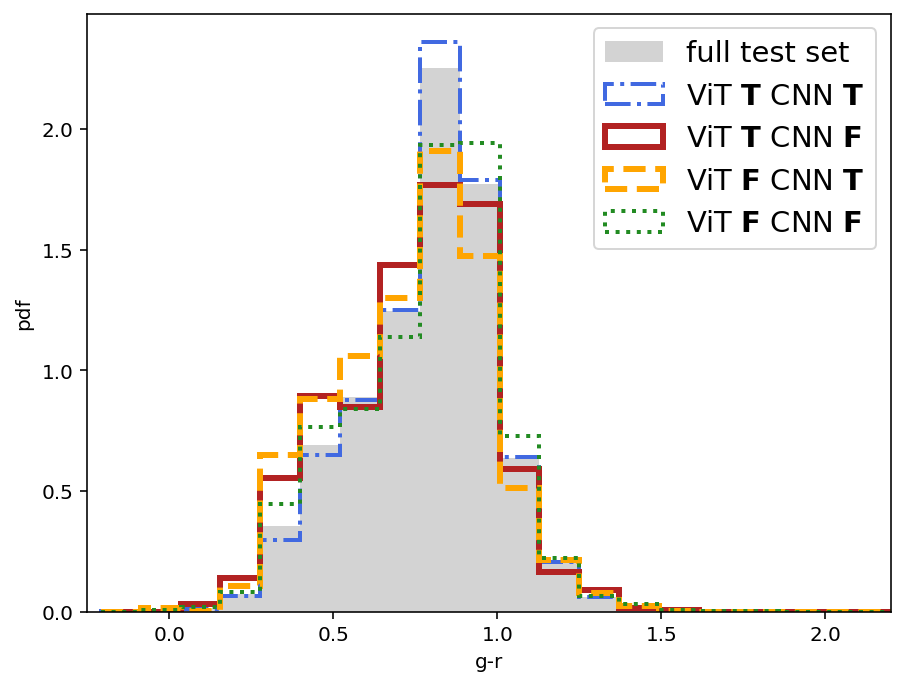

In [8]:
fig, ax = plt.subplots(figsize=(7.2, 5.5))
plt.rc('font', size=16)

#tag = 'model_g_r'
tag = 'dered_g_r'
bins = np.linspace(df[tag].min(), df[tag].max(),80)


ax.hist(df[tag]     , bins=bins, color='lightgray'  , label='full test set', density=True)
ax.hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', histtype='step' , lw=2, ls='-.', density=True)
ax.hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{T}$ CNN $\bf{F}$', histtype='step', lw=3, density=True)
ax.hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{F}$ CNN $\bf{T}$', histtype='step' , lw=3, ls='--', density=True)
ax.hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', histtype='step', lw=2, ls=':', density=True)

#r"$\bf{" + str(number) + "}$"

ax.set_xlabel('g-r')
ax.set_ylabel('pdf')
ax.set_xlim(-0.25, 2.2)

ax.legend(fontsize=14.5)

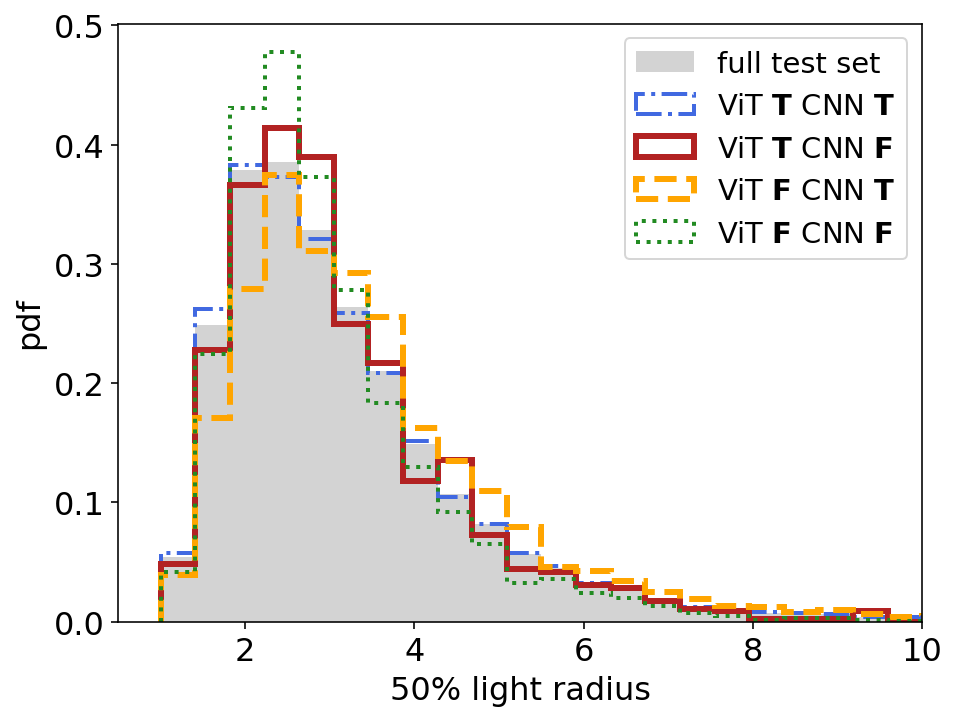

In [9]:
fig, ax = plt.subplots(figsize=(7.2, 5.5))
plt.rc('font', size=16)

tag = 'petroR50_r'
bins = np.linspace(df[tag].min(), df[tag].max(),50)

ax.hist(df[tag]     , bins=bins, color='lightgray'  , label='full test set', density=True)
ax.hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', histtype='step' , lw=2, ls='-.', density=True)
ax.hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{T}$ CNN $\bf{F}$', histtype='step', lw=3, density=True)
ax.hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{F}$ CNN $\bf{T}$', histtype='step' , lw=3, ls='--', density=True)
ax.hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', histtype='step', lw=2, ls=':', density=True)

#r"$\bf{" + str(number) + "}$"

ax.set_xlabel('50% light radius')
ax.set_ylabel('pdf')
ax.set_xlim(0.5, 10)

ax.legend(fontsize=14.5)

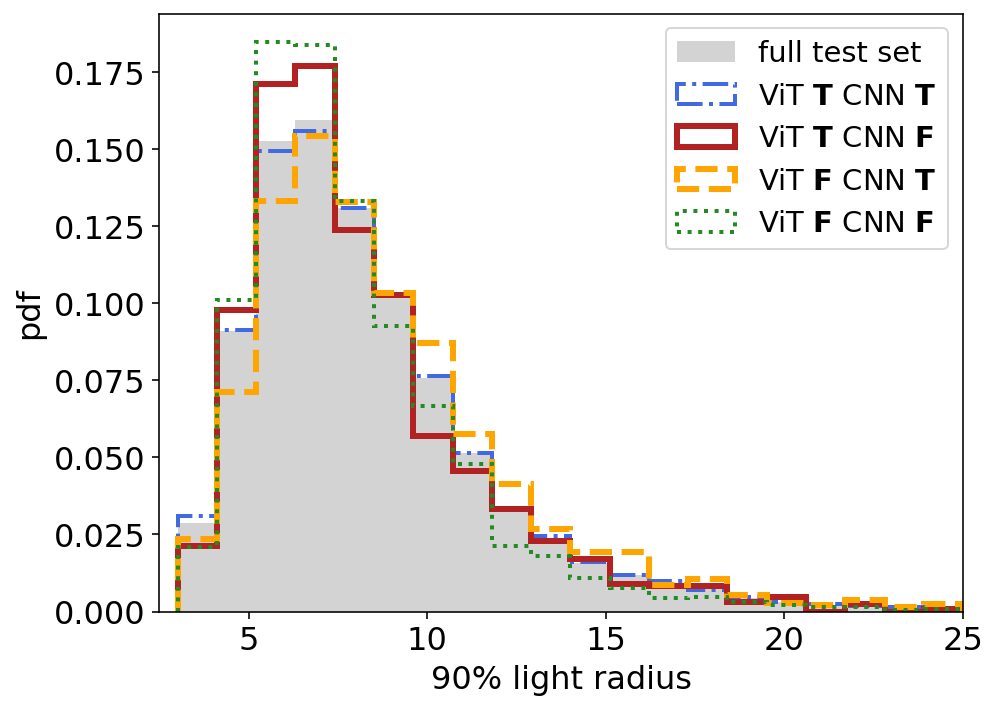

In [10]:
fig, ax = plt.subplots(figsize=(7.2, 5.5))
plt.rc('font', size=16)

tag = 'petroR90_r'
bins = np.linspace(df[tag].min(), df[tag].max(),50)

ax.hist(df[tag]     , bins=bins, color='lightgray'  , label='full test set', density=True)
ax.hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', histtype='step' , lw=2, ls='-.', density=True)
ax.hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{T}$ CNN $\bf{F}$', histtype='step', lw=3, density=True)
ax.hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{F}$ CNN $\bf{T}$', histtype='step' , lw=3, ls='--', density=True)
ax.hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', histtype='step', lw=2, ls=':', density=True)

#r"$\bf{" + str(number) + "}$"

ax.set_xlabel('90% light radius')
ax.set_ylabel('pdf')
ax.set_xlim(2.5, 25)

ax.legend(fontsize=14.5)

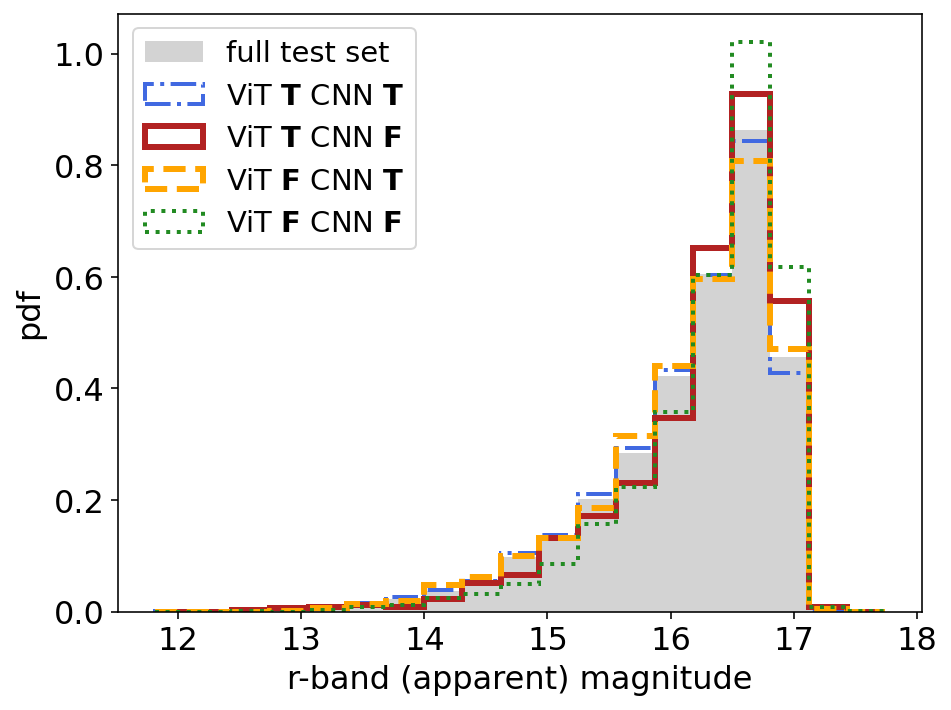

In [11]:
fig, ax = plt.subplots(figsize=(7.2, 5.5))
plt.rc('font', size=16)

tag = 'dered_r'
bins = np.linspace(df[tag].min(), df[tag].max(),20)

ax.hist(df[tag]     , bins=bins, color='lightgray'  , label='full test set', density=True)
ax.hist(df_vTrT[tag], bins=bins, color='royalblue'  , label=r'ViT $\bf{T}$ CNN $\bf{T}$', histtype='step' , lw=2, ls='-.', density=True)
ax.hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{T}$ CNN $\bf{F}$', histtype='step', lw=3, density=True)
ax.hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{F}$ CNN $\bf{T}$', histtype='step' , lw=3, ls='--', density=True)
ax.hist(df_vFrF[tag], bins=bins, color='forestgreen', label=r'ViT $\bf{F}$ CNN $\bf{F}$', histtype='step', lw=2, ls=':', density=True)

#r"$\bf{" + str(number) + "}$"

ax.set_xlabel('r-band (apparent) magnitude')
ax.set_ylabel('pdf')
#ax.set_xlim(2.5, 25)

ax.legend(fontsize=14.5)

### check galaxy image

In [12]:
dir_image = '/home/hhg/Research/galaxyClassify/catalog/galaxyZoo_kaggle/gz2_images/images'

(-0.5, 423.5, 423.5, -0.5)

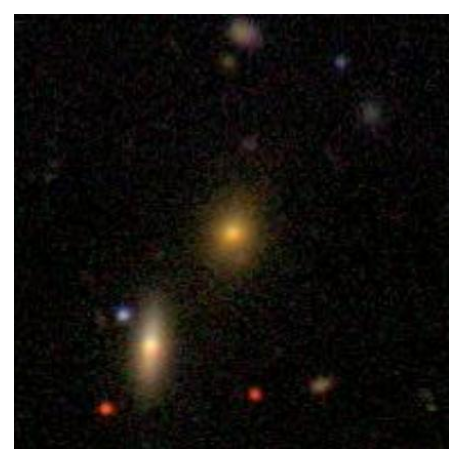

In [13]:
galaxyID = 241961
current_IMG = plt.imread(dir_image+f'/{galaxyID}.jpg')
plt.imshow(current_IMG)
plt.axis('off')